<a href="https://colab.research.google.com/github/Mehfuz-alam/Implementation_of_ANN_using_Keras/blob/main/ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
tf.__version__

'2.19.0'

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU','CPU']
for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available!")
    print(f"Details:>>{out}")
  else:
    print(f"{device} is not available!")


GPU is available!
Details:>>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details:>>[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [7]:
## Creating a simple classifier using Keras on MNIST data
mnist = tf.keras.datasets.mnist
(X_train_full , y_train_full),(X_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
len(X_test[1][0])

28

In [12]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:

# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [14]:
X_test = X_test/255

In [15]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [16]:
len(X_train_full[5000:])

55000

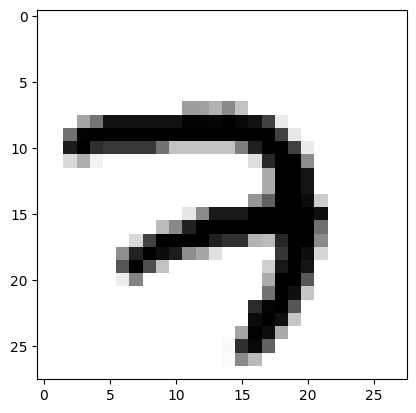

In [17]:
plt.imshow(X_train[0] , cmap = 'binary')
plt.show()

<Axes: >

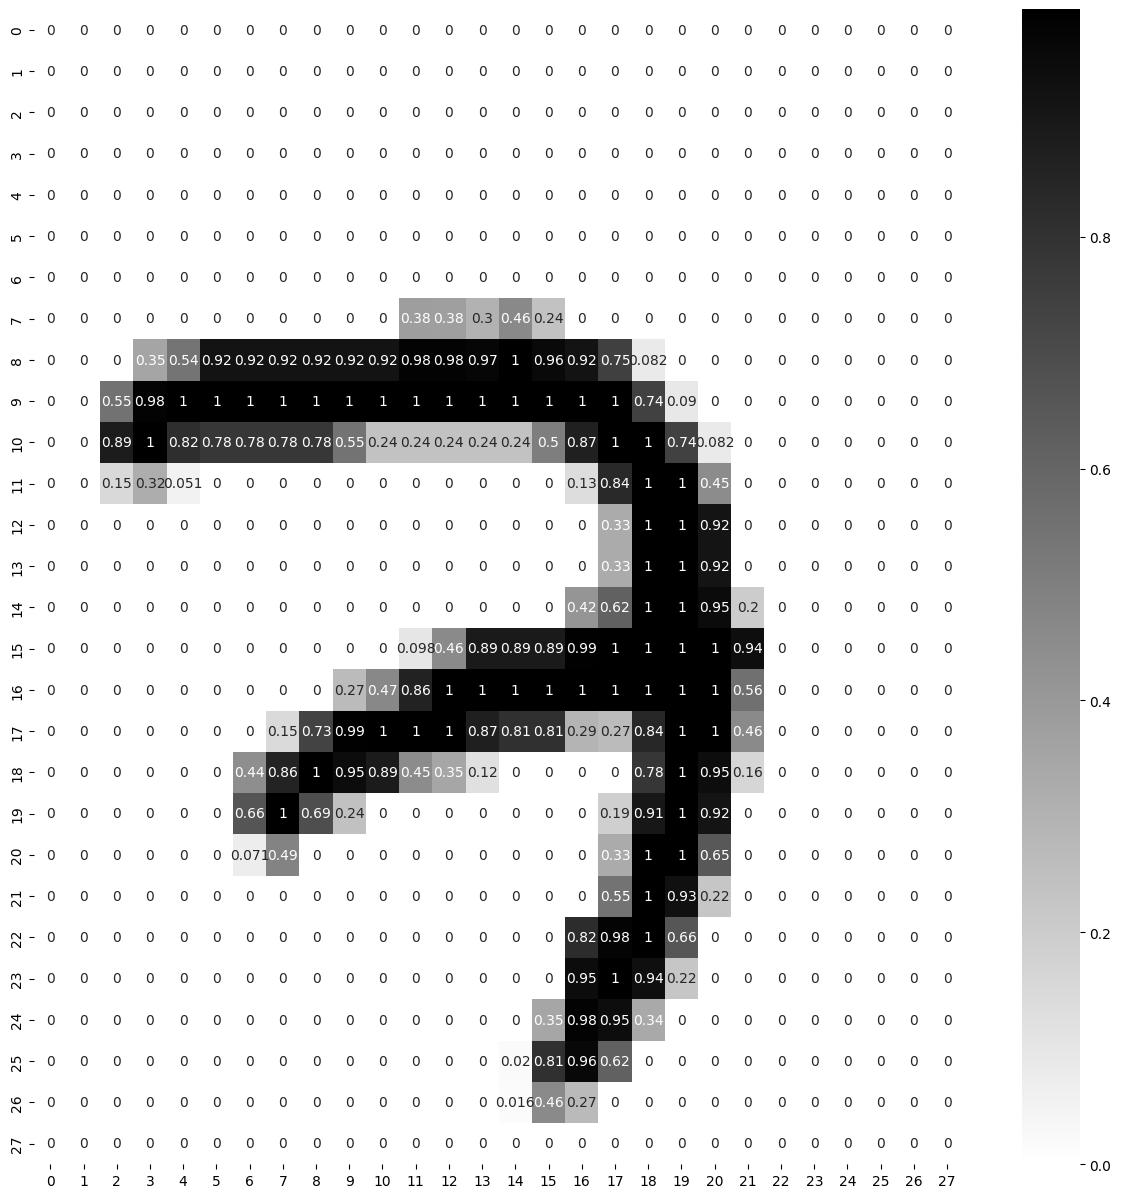

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True ,cmap ='binary')

In [19]:
# Creating layers of ANN
LAYERS = [tf.keras.Input(shape=(28, 28), name='inputLayer'),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(300, activation='relu' , name='hiddeLayer1'),
          tf.keras.layers.Dense(100, activation='relu' , name='hiddeLayer2'),
          tf.keras.layers.Dense(10, activation='softmax' , name='outputLayer')
          ]
model_clf = tf.keras.models.Sequential(LAYERS)

In [20]:
model_clf.layers

[<Flatten name=flatten, built=True>,
 <Dense name=hiddeLayer1, built=True>,
 <Dense name=hiddeLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [21]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddeLayer1 (Dense)             │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddeLayer2 (Dense)             │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:

# first Layer * second Layer + bias
784*300 + 300, 300*100 + 100 , 100*10 + 10

(235500, 30100, 1010)

In [23]:
sum((235500, 30100, 1010))

266610

In [24]:


hidden1 = model_clf.layers[1]
hidden1.name

'hiddeLayer1'

In [25]:
len(hidden1.get_weights()[1])

300

In [26]:
hidden1.get_weights()

[array([[ 0.01181744, -0.06448302,  0.03900447, ...,  0.0333378 ,
         -0.03438416,  0.07428719],
        [-0.0212905 , -0.0410541 ,  0.00060468, ..., -0.05477893,
          0.05510221, -0.01292912],
        [-0.01414239,  0.01412842,  0.05856492, ..., -0.07288966,
         -0.01127785, -0.0352515 ],
        ...,
        [ 0.01838729,  0.0363855 ,  0.00204266, ...,  0.02320147,
          0.00440577, -0.0404747 ],
        [ 0.02659802,  0.00311427, -0.00213454, ...,  0.0152042 ,
          0.02932096, -0.00682205],
        [ 0.03414297,  0.03064917, -0.02075639, ...,  0.03254367,
          0.0185735 , -0.02138203]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
weights , biases =hidden1.get_weights()

In [28]:
weights.shape

(784, 300)

In [29]:
biases.shape

(300,)

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION ,
                   optimizer=OPTIMIZER,
                   metrics=METRICS)

In [31]:
EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)
history = model_clf.fit(X_train , y_train ,epochs=EPOCHS , validation_data=VALIDATION_SET , batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7263 - loss: 1.0358 - val_accuracy: 0.9164 - val_loss: 0.3082
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9118 - loss: 0.3067 - val_accuracy: 0.9308 - val_loss: 0.2391
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9301 - loss: 0.2466 - val_accuracy: 0.9448 - val_loss: 0.2023
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9416 - loss: 0.2062 - val_accuracy: 0.9480 - val_loss: 0.1784
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9491 - loss: 0.1807 - val_accuracy: 0.9570 - val_loss: 0.1599
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9561 - loss: 0.1578 - val_accuracy: 0.9574 - val_loss: 0.1495
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9595 - loss: 0.1450 - val_accuracy: 0.9636 - val_loss: 0.1346
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9632 - loss: 0.1312 - 

In [32]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [33]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.838964,0.619232,0.9164,0.308167
1,0.917400,0.289090,0.9308,0.239055
2,0.932964,0.234961,0.9448,0.202340
3,0.943345,0.200524,0.9480,0.178423
4,0.950073,0.175522,0.9570,0.159855
5,0.955764,0.156094,0.9574,0.149462
6,0.959945,0.140431,0.9636,0.134554
7,0.964327,0.127454,0.9670,0.124995
8,0.967291,0.116217,0.9692,0.115692
9,0.970309,0.106743,0.9702,0.110150


<Axes: >

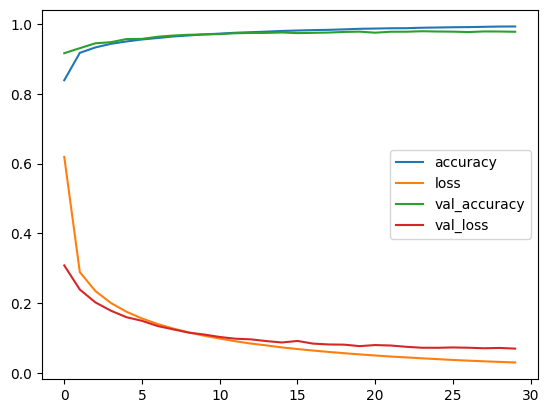

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
model_clf.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.0851


[0.0722026377916336, 0.9778000116348267]

In [36]:
x_new = X_test[:3]

In [37]:
actual = y_test[:3]

In [38]:
actual

array([7, 2, 1], dtype=uint8)

In [39]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [40]:
y_prob

array([[6.5876765e-07, 7.4566074e-08, 2.5973479e-05, 3.3741692e-04,
        2.5839764e-09, 1.5742042e-07, 1.5512177e-11, 9.9962902e-01,
        1.5934783e-06, 5.0669282e-06],
       [7.1717193e-07, 3.6312667e-05, 9.9973959e-01, 2.2025302e-04,
        1.8652569e-11, 1.1622662e-07, 5.4628339e-07, 1.3694051e-10,
        2.3853192e-06, 5.9541968e-12],
       [8.1970217e-07, 9.9699128e-01, 1.9676521e-04, 2.5824407e-05,
        1.7770713e-04, 6.7184359e-05, 5.3224965e-05, 1.3794680e-03,
        1.0960493e-03, 1.1665666e-05]], dtype=float32)

In [41]:
y_pred = np.argmax(y_prob , axis=1)

In [42]:
y_pred

array([7, 2, 1])

In [43]:
actual

array([7, 2, 1], dtype=uint8)

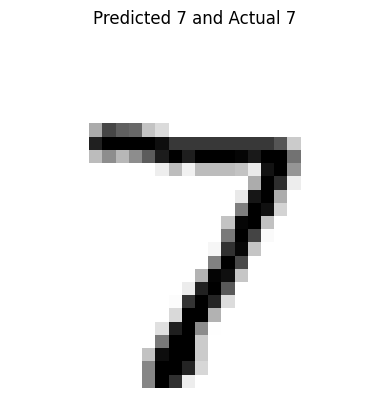

-----------------------------------------------------


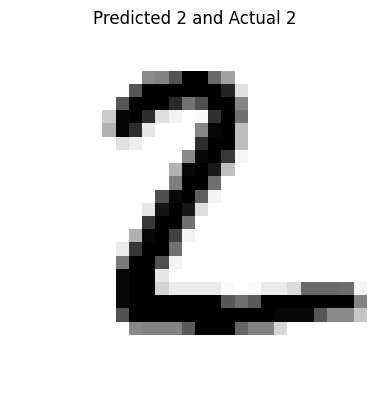

-----------------------------------------------------


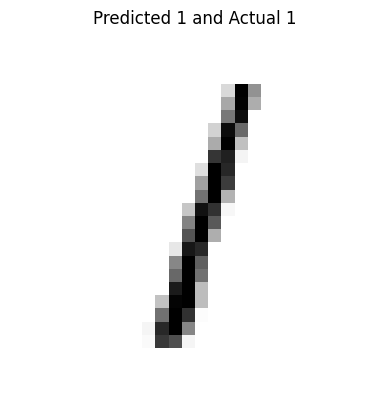

-----------------------------------------------------


In [46]:
for  data , pred , actual_data in zip(x_new , y_pred ,actual):
  plt.imshow(data , cmap = 'binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("-----------------------------------------------------")

